In [ ]:
# This workbook contains a small script to plot some features of interest on a protein that can be manually selected. 
# As input this requires the .pkl file generated in workbook 2. 
# The amino acids plotted for example can be changed into any of those of interest. To do so, just copy the piece for
# axis 5 and make it axis 6 and put another amino acid there. Also make sure to add a line for axis 6 to
# yaxis label, yaxis y limits and yaxis label position. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from scipy import signal
import pickle5 as pickle

class IuPred:
    def __init__(self, glob, short, long):
        self.glob = glob
        self.short = short
        self.long = long


class ConservedDomains:
    def __init__(self, data):
        self.data = data


class HydroPhobicIndex:
    def __init__(self, hpilist):
        self.hpilist = hpilist

    def sliding_window(self, w):
        l = list()
        for i in range(len(self.hpilist)):
            l.append(average(self.hpilist[i: i+w]))
        return l

In [2]:
# read in .pkl file from workbook 2
fpath = '/path/to/workbook2/output.pkl'
df = pd.read_pickle(fpath)
df2 = df # make a copy to subset from later

In [10]:
# Select protein of interest
df = df2
# df = df[df['protein_name'] == 'YBOX1_HUMAN'] # select one protein only
df = df[(df['protein_name'] == 'YBOX1_HUMAN') | (df['protein_name'] == 'YBOX2_HUMAN')] # select two proteins (or add more if required)

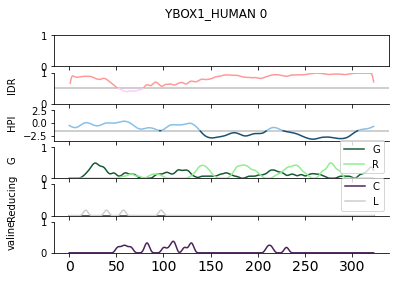

<Figure size 864x1008 with 0 Axes>

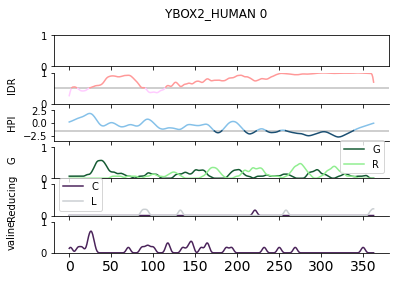

<Figure size 864x1008 with 0 Axes>

Done !


In [11]:
class IuPred:
    def __init__(self, glob, short, long):
        self.glob = glob
        self.short = short
        self.long = long

class ConservedDomains:
    def __init__(self, data):
        self.data = data


class HydroPhobicIndex:
    def __init__(self, hpilist):
        self.hpilist = hpilist

    def sliding_window(self, w):
        l = list()
        for i in range(len(self.hpilist)):
            l.append(average(self.hpilist[i: i+w]))
        return l


def average(l):
    return sum(l)/ len(l)





# Plotting fraction of domains in protein
def fractiondomain():
    pp = PdfPages('multipage_plot.pdf')

    # Loop to make plot for each protein
    for index, row in df.iterrows():
        seq = str(row['sequence'])
        fig, ax = plt.subplots(6,1, sharex=True)

    # Axis 1: IDR
        ax[1].spines["top"].set_visible(False)
        ax[1].spines["right"].set_visible(False)
        ax[1].axhline(y=0.5, color='#C0C0C0', linestyle='-')
        # ax[1].plot(row['iupred'].glob[0], color='#FF9999')
        sig = np.asarray(convolve_signal(sig=row['iupred'].glob[0], window=10))
        pos_signal = sig.copy()
        neg_signal = sig.copy()
        pos_signal[pos_signal <= 0.5] = np.nan
        neg_signal[neg_signal > 0.5] = np.nan
        ax[1].plot(pos_signal, color='#FF9999')
        ax[1].plot(neg_signal, color='#FFCCFF')

    # Axis 2: Hydrophobicity
        cutoff = -1.5
        ax[2].spines["top"].set_visible(False)
        ax[2].spines["right"].set_visible(False)
        ax[2].axhline(y=cutoff, color='#C0C0C0', linestyle='-')
        hpi = row['HydroPhobicIndex'].hpilist
        sig = np.asarray(convolve_signal(hpi, 30))
        pos_signal = sig.copy()
        neg_signal = sig.copy()
        pos_signal[pos_signal <= cutoff] = np.nan
        neg_signal[neg_signal > cutoff] = np.nan
        ax[2].plot(pos_signal, color='#85C1E9')
        ax[2].plot(neg_signal, color='#1B4F72')

    # Axis 3: Dissordered promoting residues
        ax[3].spines["top"].set_visible(False)
        ax[3].spines["right"].set_visible(False)

        # Glycine
        glycine = convolve_residues(seq=seq, residues=['G'], window=10)
        ax[3].plot(sliding_window(glycine, 15), color='#145A32')
        arginine = convolve_residues(seq=seq, residues=['R'], window=10)
        ax[3].plot(sliding_window(arginine, 15), color='lightgreen')
        ax[3].legend(['G', 'R'])


        # Other proteins
       # disspromoting = convolve_residues(seq=seq, residues=['Q', 'D', 'E', 'G', 'R'], window=10)
        #ax[3].plot(sliding_window(disspromoting, 15), color='#27AE60')

    # Axis 4: Cysteine, Leucine, Tryptophan
        w = 5
        ax[4].spines["top"].set_visible(False)
        ax[4].spines["right"].set_visible(False)
        cysteine = convolve_residues(seq=seq, residues=['C'], window=10)
        ax[4].plot(sliding_window(cysteine, w), color='#4A235A')
        leucine = convolve_residues(seq=seq, residues=['L'], window=10)
        ax[4].plot(sliding_window(leucine, w), color='#CACFD2')
        ax[4].legend(['C', 'L'])

    # Axis 5: V
        w = 5
        ax[5].spines["top"].set_visible(False)
        ax[5].spines["right"].set_visible(False)
        valine = convolve_residues(seq=seq, residues=['V'], window=10)
        ax[5].plot(sliding_window(valine, w), color='#4A235A')

        
    # yaxis label
        ax[1].set(ylabel='IDR')
        ax[2].set(ylabel='HPI')
        ax[3].set(ylabel='G and R')
        ax[4].set(ylabel='C and L')
        ax[5].set(ylabel='V')

    # yaxis y limits
        ax[1].set_ylim(0, 1)
        ax[2].set_ylim(-3.5, 2.5)
        ax[3].set_ylim(0, 1)
        ax[4].set_ylim(0, 1)
        ax[5].set_ylim(0, 1)

    # yaxis label position
        ax[1].yaxis.set_label_coords(-.11, .6)
        ax[2].yaxis.set_label_coords(-.11, .6)
        ax[3].yaxis.set_label_coords(-.11, .6)
        ax[4].yaxis.set_label_coords(-.11, .6)
        ax[5].yaxis.set_label_coords(-.11, .6)

    # Miscellaneous information
        fig.suptitle((row['protein_name'] + ' ' + str(row['llps'])))
        plt.xticks(fontsize=14)
        plt.figure(figsize=(12, 14))
        plt.tight_layout()
        plt.show()
        pp.savefig(fig)
    pp.close()

def aa_signature(seq, aa):
    l = list()
    for i in seq:
        if i == aa:
            l.append(1)
        else:
            l.append(0)
    return l

def motif_signature(seq, aalist):
    l = list()
    for i in seq:
        if i in aalist:
            l.append(1)
        else:
            l.append(0)
    return l

def sliding_window(l, w):
    swlist = list()
    for i in range(len(l)):
        swlist.append(average(l[i: i + w]))
    return swlist


def convolve_residues(seq, residues, window):
    sig = [1 if i in residues else 0 for i in seq]
    filtered = convolve_signal(sig, window)
    return filtered

def convolve_signal(sig, window):
    win = signal.hann(window)
    filtered = signal.convolve(sig, win, mode='same') / sum(win)
    return filtered.tolist()


def main():
    fractiondomain()
    print('Done !')


if __name__ == '__main__':
    main()
